In [2]:
import pandas as pd
import re
from pathlib import Path
import datetime

In [4]:
log_path = Path("../pager.log")
job_re = re.compile("(\w+) *(PTS|GREEN|ORANGE|RED|PURPLE) *(.+) *; *Flat\/Unit:([\w\- ]+\/[\w\- ]+[A-Z]{2,})")
date_re = re.compile(" (\d{4}-\d{2}-\d{2} \d{2}:\d{2}:\d{2}):")

In [5]:
df = {
    "Date": [],
    "Unit": [],
    "Priority": [],
    "Detail": [],
    "Address": [],
    "Full": []
}

with open(log_path) as f:
    for line in f:
        job_match = job_re.search(line)
        if job_match is None: continue
        date_match = date_re.search(line)
        if date_match is None: continue
        date = datetime.datetime.strptime(date_match[1], "%Y-%m-%d %H:%M:%S")

        df["Date"].append(date)
        df["Unit"].append(job_match[1])
        df["Priority"].append(job_match[2])
        df["Detail"].append(job_match[3])
        df["Address"].append(job_match[4])
        df["Full"].append(job_match[0])

df = pd.DataFrame(df)
df.Priority = df.Priority.astype("category").cat.reorder_categories(["PTS", "GREEN", "ORANGE", "RED", "PURPLE"])

array([<AxesSubplot:ylabel='Full'>], dtype=object)

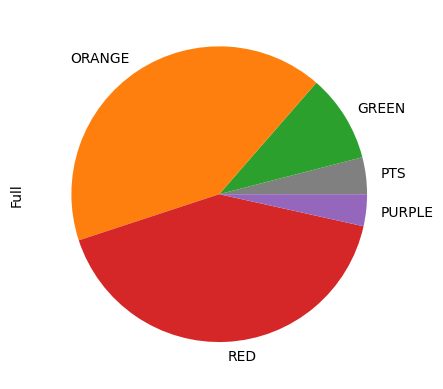

In [6]:
df.pivot_table(index="Priority", values="Full", aggfunc=len).plot.pie(subplots=True, legend=False, colors=["gray", "tab:green", "tab:orange", "tab:red", "tab:purple"])